In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf 

In [2]:
start = '2012-01-01'
end = '2022-12-21'
stock  = 'GOOG' 

data = yf.download(stock, start, end)

C:\Users\Pial\AppData\Local\Temp\ipykernel_16468\3491760051.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
2012-01-04,16.546259,16.595036,16.356602,16.465791,114989399
2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
2012-01-06,16.094151,16.341249,16.088455,16.320203,108119746
2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...
2022-12-14,94.746811,96.645528,93.384911,94.975455,26452900
2022-12-15,90.661102,93.474382,89.895656,92.987279,28298800


In [4]:
data.reset_index(inplace=True)

In [5]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
1,2012-01-04,16.546259,16.595036,16.356602,16.465791,114989399
2,2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
3,2012-01-06,16.094151,16.341249,16.088455,16.320203,108119746
4,2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.746811,96.645528,93.384911,94.975455,26452900
2757,2022-12-15,90.661102,93.474382,89.895656,92.987279,28298800
2758,2022-12-16,90.323105,91.207845,89.478129,90.661092,48485500


In [6]:
ma_100_days = data.Close.rolling(100).mean()

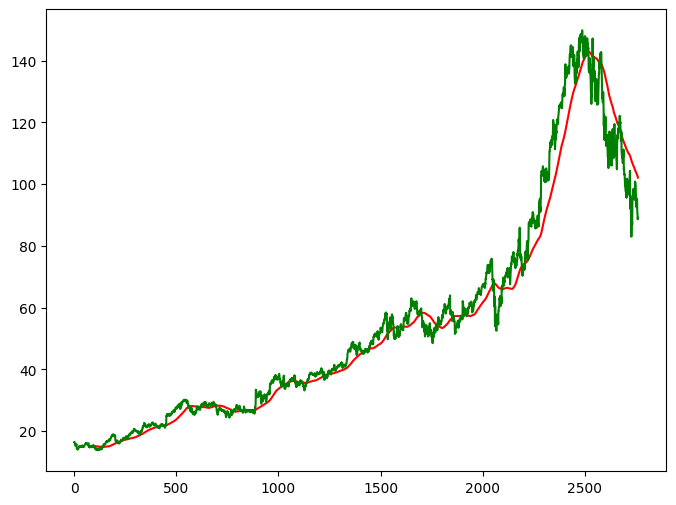

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

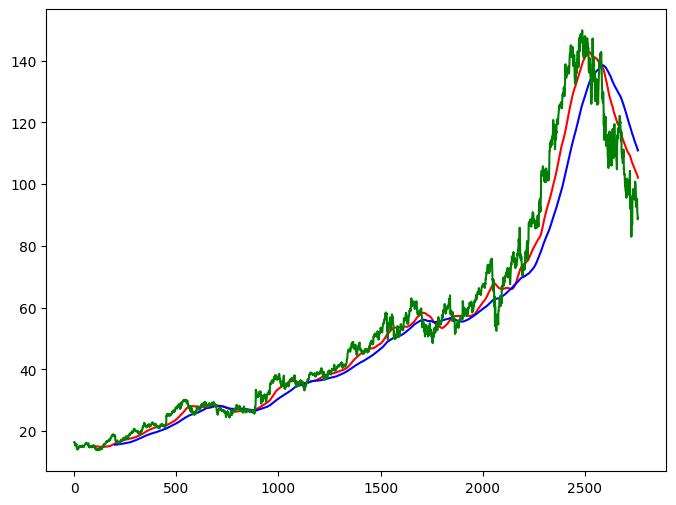

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2208

In [13]:
data_test.shape[0]


553

In [14]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = [] 
y = [] 

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [17]:
x, y = np.array(x), np.array(y)

In [18]:
from keras.layers import Input, LSTM, Dense, Bidirectional, Layer, MultiHeadAttention, LayerNormalization, Dropout
from keras.models import Sequential 
import tensorflow as tf

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
                input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


C:\Users\Pial\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
model.fit(x,y, epochs = 50, batch_size = 32,verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - loss: 0.0666
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0075
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0057
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0048
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0064
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0043
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0043
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0041
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0038
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0036
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0043
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0036
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0031
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0035
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0031
Epoc

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [25]:
data_test_scale = scaler.fit_transform(data_test)

In [26]:
x = [] 
y = [] 

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)

In [27]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [28]:
scale =1/scaler.scale_

In [29]:
y_predict = y_predict*scale

In [30]:
y = y*scale

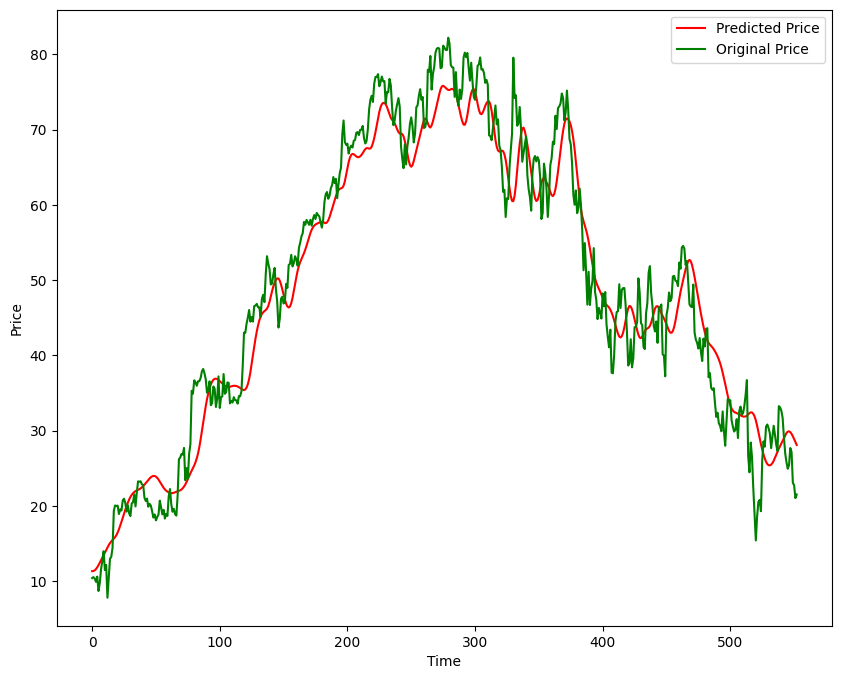

In [31]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g',label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [32]:
model.save('LSTM model.keras')

In [33]:
from keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

In [34]:
data_close = data[['Close']].copy()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_close)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)
    

In [35]:
seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

X = X.reshape((X.shape[0], X.shape[1], 1))



In [36]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [37]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer, Input, Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

In [38]:
class Attention(Layer):
  
    def __init__(self, return_attention=False, **kwargs):
        super().__init__(**kwargs)
        self.return_attention = return_attention
        self.attention_scores = None  # cache for inspection

    def build(self, input_shape):
        # input_shape = (batch, timesteps, features)
        self.W = self.add_weight(
            name="att_weight",
            shape=(input_shape[-1], 1),
            initializer="glorot_uniform",
            trainable=True,
        )
        self.b = self.add_weight(
            name="att_bias",
            shape=(1,),
            initializer="zeros",
            trainable=True,
        )
        super().build(input_shape)

    def call(self, x):
        # x: (batch, timesteps, features)
        e = K.tanh(K.dot(x, self.W) + self.b)
        e = K.squeeze(e, axis=-1)  # (batch, timesteps)
        alpha = K.softmax(e)
        self.attention_scores = alpha
        alpha_expanded = K.expand_dims(alpha, axis=-1)
        context = x * alpha_expanded
        context = K.sum(context, axis=1)
        return context

    def get_config(self):
        cfg = super().get_config()
        cfg.update({"return_attention": self.return_attention})
        return cfg
 

In [39]:
seq_len = X_train.shape[1]
inputs = Input(shape=(seq_len, 1), name="input_window")

x = Bidirectional(LSTM(50, return_sequences=True), name="bilstm_1")(inputs)
x = Dropout(0.2, name="dropout_1")(x)

x = Bidirectional(LSTM(50, return_sequences=True), name="bilstm_2")(x)
x = Dropout(0.2, name="dropout_2")(x)

x = Attention(name="attention")(x)  # returns context vector

outputs = Dense(1, name="price_out")(x)

bi_lstm_att_model = Model(inputs=inputs, outputs=outputs, name="BiLSTM_Attention")

In [40]:
bi_lstm_att_model.compile(optimizer="adam", loss="mean_squared_error")

history_att = bi_lstm_att_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1,
)

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0054 - val_loss: 0.0061
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.2211e-04 - val_loss: 0.0058
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.6608e-04 - val_loss: 0.0048
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.6907e-04 - val_loss: 0.0056
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.4600e-04 - val_loss: 0.0050
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.2717e-04 - val_loss: 0.0043
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.3400e-04 - val_loss: 0.0034
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 4.3752e-04 - val_loss: 0.0060
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 4.0066e-04 - val_loss: 0.0040
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.0569e-04 - val_loss: 0.0027
Epoch 11/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 3.4662e-04 - val_loss: 0.0047
Epoch 12/20
68/68 ━━━━━

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


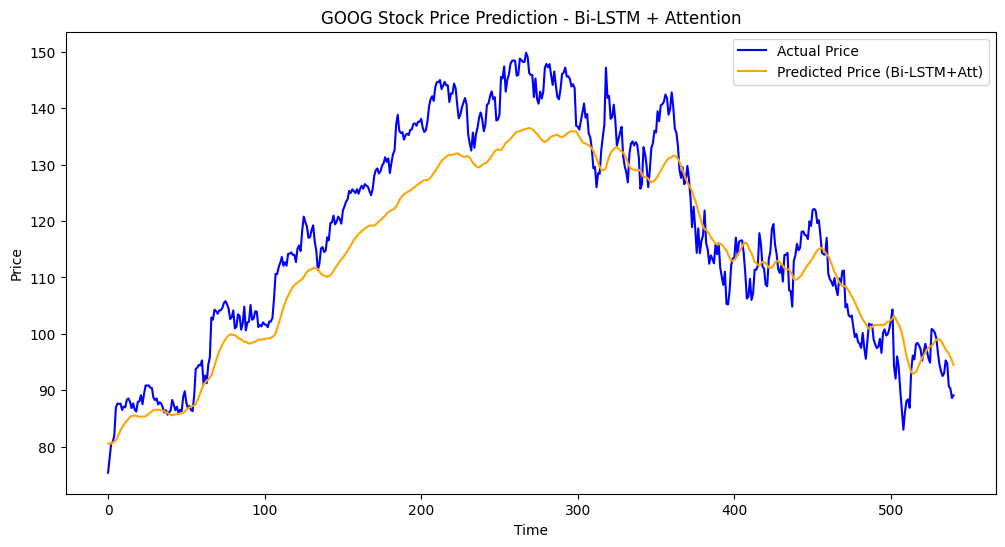

In [42]:
pred_att = bi_lstm_att_model.predict(X_test)
pred_att_prices = scaler.inverse_transform(pred_att.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(real_prices, label="Actual Price", color="blue")
plt.plot(pred_att_prices, label="Predicted Price (Bi-LSTM+Att)", color="orange")
plt.title(f"{stock} Stock Price Prediction - Bi-LSTM + Attention")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [43]:
future_days = 100
last_sequence = scaled_data[-seq_length:]
predictions = []

for _ in range(future_days):
    input_seq = last_sequence.reshape(1, seq_length, 1)
    
    pred = model.predict(input_seq)[0][0]
    predictions.append(pred)
    last_sequence = np.append(last_sequence[1:], [[pred]], axis=0)

future_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

In [44]:
full_actual = data_close.values
full_dates = data['Date'].tolist() if 'Date' in data.columns else data.index.tolist()


In [45]:
from datetime import timedelta
last_date = pd.to_datetime(full_dates[-1])
future_dates = [last_date + timedelta(days=i+1) for i in range(future_days)]

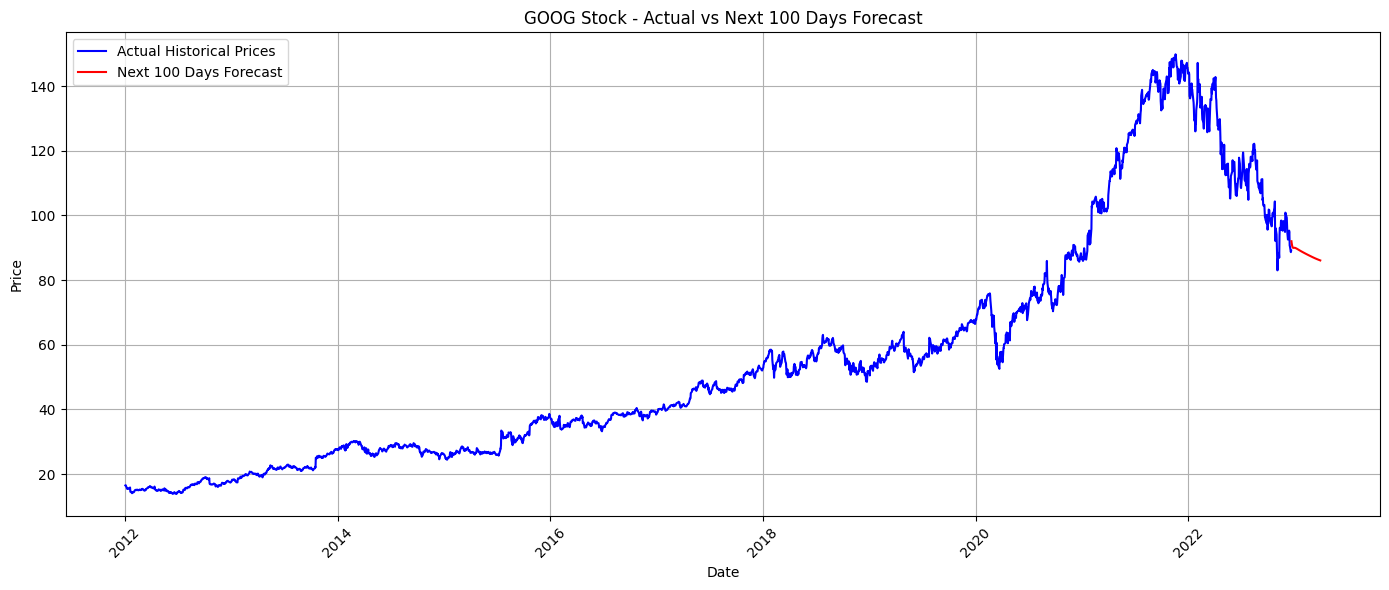

In [46]:
plt.figure(figsize=(14, 6))
plt.plot(full_dates, full_actual, label='Actual Historical Prices', color='blue')
plt.plot(future_dates, future_prices, label='Next 100 Days Forecast', color='red')
plt.title(f'{stock} Stock - Actual vs Next 100 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [48]:
bi_lstm_att_model.save('bi_lstm_attention_model.keras')